# Project3

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Q3

In [100]:
Ad = np.mat([[0.7, -0.1], [0.2, 1]])
Bd = np.mat([[0.1], [0]])
Cd = np.mat([0, 1])

step = 200
x = np.zeros((2,step+1))
y = np.zeros((1,step+1))
v = np.zeros((1,step+1))
v[0,0] = np.random.normal(0, 1, 1)
y[0,0] = v[0,0]

for k in range(step):
    u = np.cos(4*np.pi*k / 200)
    w = np.random.multivariate_normal(np.array([0,0]), np.mat([[0.0025, 0], [0, 0]]), 1)
    x_k = np.mat([[x[0,k]], [x[1,k]]])
    x_next = Ad @ x_k + Bd * u + w.T
    x[0,k+1] = x_next[0,0]
    x[1,k+1] = x_next[1,0]

    v[0,k+1] = np.random.normal(0, 1, 1)
    y[0,k+1] = Cd @ x_next + v[0,k+1]

x_file = open("x_simulated.txt", "w")
x_str = str(x)
x_file.write(x_str)
x_file.close()

y_file = open("y_simulated.txt", "w")
y_str = str(y)
y_file.write(y_str)
y_file.close()

Plot figures:

Text(0.5, 1.0, 'Measurement Errors')

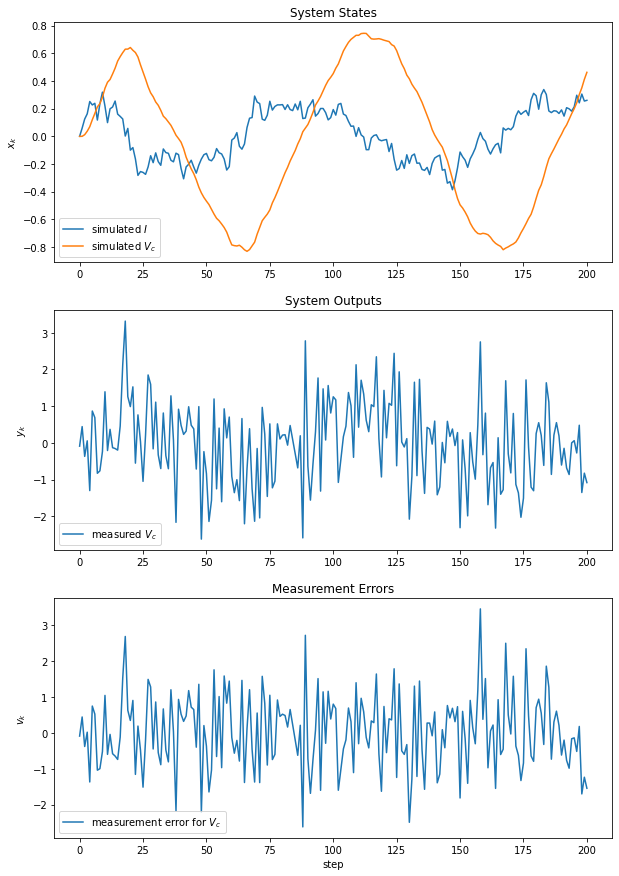

In [101]:
dt = 0.1
t = np.arange(201)
fig, axes = plt.subplots(3, 1, figsize=(10,15))
axes[0].plot(t, x[0,:],label='simulated $I$')
axes[0].plot(t, x[1,:],label='simulated $V_c$')
axes[0].legend(loc='lower left')
axes[0].set_ylabel('$x_k$')
axes[0].set_title('System States')

axes[1].plot(t, y[0,:],label='measured $V_c$')
axes[1].legend(loc='lower left')
axes[1].set_ylabel('$y_k$')
axes[1].set_title('System Outputs')

axes[2].plot(t, v[0,:],label='measurement error for $V_c$')
axes[2].legend(loc='lower left')
axes[2].set_xlabel('step')
axes[2].set_ylabel('$v_k$')
axes[2].set_title('Measurement Errors')

## Q4

In [102]:
Ak = Ad
Bk = Bd
Ck = Cd
Qk = np.mat([[0.0025, 0], [0, 0]])
Rk = 1

x_estimate = np.zeros((2,step+1))
P = 0.1 * np.eye(2)

for k in range(step):
    u = np.cos(4*np.pi*k / 200)

    #Prediction
    x_k = np.mat([[x_estimate[0,k]], [x_estimate[1,k]]])
    x_predict = Ak @ x_k + Bk * u
    P_predict = Ak @ P @ Ak.T + Qk

    #Measurement Update
    K = P_predict @ Ck.T @ (Ck @ P_predict @ Ck.T + Rk).I
    x_update = x_predict + K * (y[:,k+1] - Ck @ x_predict)
    P = (np.eye(2) - K @ Ck) @ P_predict
    x_estimate[0,k+1] = x_update[0,0]
    x_estimate[1,k+1] = x_update[1,0]

Plot figures:

Text(0.5, 1.0, 'Errors')

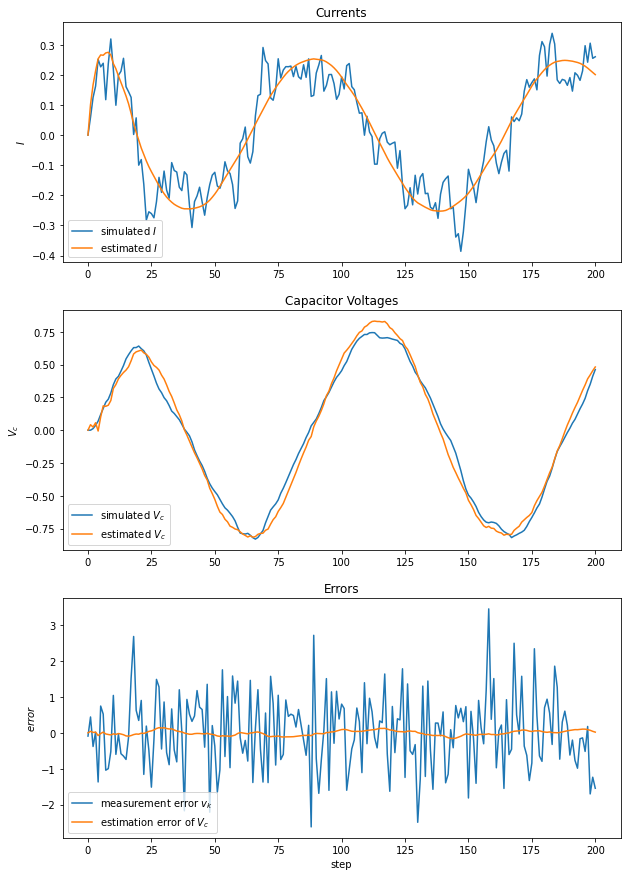

In [103]:
dt = 0.1
t = np.arange(201)
fig, axes = plt.subplots(3, 1, figsize=(10,15))
axes[0].plot(t, x[0,:],label='simulated $I$')
axes[0].plot(t, x_estimate[0,:],label='estimated $I$')
axes[0].legend(loc='lower left')
axes[0].set_ylabel('$I$')
axes[0].set_title('Currents')

axes[1].plot(t, x[1,:],label='simulated $V_c$')
axes[1].plot(t, x_estimate[1,:],label='estimated $V_c$')
axes[1].legend(loc='lower left')
axes[1].set_ylabel('$V_c$')
axes[1].set_title('Capacitor Voltages')

axes[2].plot(t, v[0,:],label='measurement error $v_k$')
axes[2].plot(t, x_estimate[1,:] - x[1,:],label='estimation error of $V_c$')
axes[2].legend(loc='lower left')
axes[2].set_xlabel('step')
axes[2].set_ylabel('$error$')
axes[2].set_title('Errors')

## Q5

In [104]:
x_estimate = np.zeros((2,step+1,4))
P = 0.1 * np.eye(2)

#### sigma = 0.001

In [105]:
sigma = 0.001
Qk = sigma * np.eye(2)

for k in range(step):
    #Prediction
    x_k = np.mat([[x_estimate[0,k,0]], [x_estimate[1,k,0]]])
    x_predict = Ak @ x_k
    P_predict = Ak @ P @ Ak.T + Qk

    #Measurement Update
    K = P_predict @ Ck.T @ (Ck @ P_predict @ Ck.T + Rk).I
    x_update = x_predict + K * (y[:,k+1] - Ck @ x_predict)
    P = (np.eye(2) - K @ Ck) @ P_predict
    x_estimate[0,k+1,0] = x_update[0,0]
    x_estimate[1,k+1,0] = x_update[1,0]

#### sigma = 0.01

In [106]:
sigma = 0.01
Qk = sigma * np.eye(2)

for k in range(step):
    #Prediction
    x_k = np.mat([[x_estimate[0,k,1]], [x_estimate[1,k,1]]])
    x_predict = Ak @ x_k
    P_predict = Ak @ P @ Ak.T + Qk

    #Measurement Update
    K = P_predict @ Ck.T @ (Ck @ P_predict @ Ck.T + Rk).I
    x_update = x_predict + K * (y[:,k+1] - Ck @ x_predict)
    P = (np.eye(2) - K @ Ck) @ P_predict
    x_estimate[0,k+1,1] = x_update[0,0]
    x_estimate[1,k+1,1] = x_update[1,0]

#### sigma = 0.02

In [107]:
sigma = 0.02
Qk = sigma * np.eye(2)

for k in range(step):
    #Prediction
    x_k = np.mat([[x_estimate[0,k,2]], [x_estimate[1,k,2]]])
    x_predict = Ak @ x_k
    P_predict = Ak @ P @ Ak.T + Qk

    #Measurement Update
    K = P_predict @ Ck.T @ (Ck @ P_predict @ Ck.T + Rk).I
    x_update = x_predict + K * (y[:,k+1] - Ck @ x_predict)
    P = (np.eye(2) - K @ Ck) @ P_predict
    x_estimate[0,k+1,2] = x_update[0,0]
    x_estimate[1,k+1,2] = x_update[1,0]

#### sigma = 0.1

In [108]:
sigma = 0.1
Qk = sigma * np.eye(2)

for k in range(step):
    #Prediction
    x_k = np.mat([[x_estimate[0,k,3]], [x_estimate[1,k,3]]])
    x_predict = Ak @ x_k
    P_predict = Ak @ P @ Ak.T + Qk

    #Measurement Update
    K = P_predict @ Ck.T @ (Ck @ P_predict @ Ck.T + Rk).I
    x_update = x_predict + K * (y[:,k+1] - Ck @ x_predict)
    P = (np.eye(2) - K @ Ck) @ P_predict
    x_estimate[0,k+1,3] = x_update[0,0]
    x_estimate[1,k+1,3] = x_update[1,0]

Plot figures:

Text(0.5, 1.0, 'Capacitor Voltages')

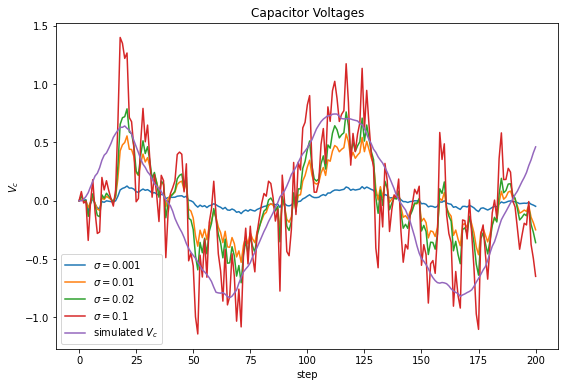

In [109]:
dt = 0.1
t = np.arange(201)
fig, axes = plt.subplots(1, 1, figsize=(9,6))

axes.plot(t, x_estimate[1,:,0],label='$\sigma=0.001$')
axes.plot(t, x_estimate[1,:,1],label='$\sigma=0.01$')
axes.plot(t, x_estimate[1,:,2],label='$\sigma=0.02$')
axes.plot(t, x_estimate[1,:,3],label='$\sigma=0.1$')
axes.plot(t, x[1,:],label='simulated $V_c$')
axes.legend(loc='lower left')
axes.set_xlabel('step')
axes.set_ylabel('$V_c$')
axes.set_title('Capacitor Voltages')

Compute Average Squared Errors:

In [110]:
mse = np.zeros((1,4))
for i in range(4):
    mse[:,i] = 1/200 * np.sum((x[1,1:]-x_estimate[1,1:,i])**2)
print(mse)

[[0.20994487 0.10723864 0.09523471 0.15970234]]


### Compute Covariance Matrix of $u_k$

In [141]:
k = np.linspace(0,199,200)
Bd = np.mat([[0.1],[0]])
uk = Bd*np.cos(4*np.pi*k / 200)
wk = (np.random.multivariate_normal(np.array([0,0]), 
np.mat([[0.0025, 0], [0, 0]]), 200)).T
input = uk + wk
E = np.mean(input,1)
C = ((input-E)@(input-E).T) / 200
print(C)

[[0.00769287 0.        ]
 [0.         0.        ]]


In [145]:
z2 = (np.random.multivariate_normal(np.array([0,0]), 0.01*np.eye(2), 200)).T
z3 = (np.random.multivariate_normal(np.array([0,0]), 0.02*np.eye(2), 200)).T
z4 = (np.random.multivariate_normal(np.array([0,0]), 0.1*np.eye(2), 200)).T

d2 = np.abs(input-z2)
d3 = np.abs(input-z3)
d4 = np.abs(input-z4)

d2_avg = np.mean(d2)
d3_avg = np.mean(d3)
d4_avg = np.mean(d4)
print(d2_avg, d3_avg, d4_avg)

0.09823053299952 0.11796060300207778 0.26374851248389025
